# Plot H5N1 beast tree using baltic for fellowship applications

In [1]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import imp
bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

import numpy as np
from scipy.special import binom

import datetime as dt

In [2]:
mpl.rcParams['font.serif'] = "Helvetica"

In [3]:
# create empty baltic tree object
myTree = bt.tree()

In [4]:
treeString='((A:1.0,B:2.0):1.0,C:3.0);'
bt.make_tree(treeString, myTree)

<baltic.tree instance at 0x117ad4d40>

In [6]:
# load trees
tree = bt.loadNexus("/Volumes/gradschool-and-postdoc-backups/post-doc/stored_files_too_big_for_laptop/H5N1_Cambodia_outbreak_study/beast/dta-2018-08-23/HA_2018-08-23.mcc.tree")

In [7]:
typeface='Helvetica'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=14

In [16]:
#make color dictionary to set colors based on geo or on host species  #other cambodia option, lighter: #ecbc91
#colors = {'wild':'#fdb771', 'domestic':'#13257a', 'unknown':'#47c5b8', 'human':'#e7e17e'}
colors = {'wild':'#CEB540', 'domestic':'#4E83AE','human':'#DE4428','not yet annotated':'#CBCACA'}
color_key = {'wild':'#CEB540', 'domestic':'#4E83AE','human':'#DE4428','not yet annotated':'#CBCACA'}

In [19]:
# read in colors from annotations file 
annotations = "/Users/lmoncla/Documents/Fellowships/data_query/H5N1_tree_annotations.txt"
colors = {}
alphas = {}
sizes = {}

with open(annotations, "r") as infile: 
    for line in infile: 
        sequence = line.split("\t")[0]
        host_group = line.split("\t")[3].strip()
        
        if host_group == 'wild':
            color = color_key['wild']
            alpha = 1
            size = 3
        elif host_group == 'domestic':
            color =  color_key['domestic']
            alpha = 1
            size = 3
        elif host_group == 'human':
            color =  color_key['human']
            alpha = 1
            size = 3
        elif host_group == 'unknown' or host_group == "":
            color =  '#CBCACA'
            alpha = 0.6
            size = 3
        else:
            color = '#CBCACA'
            alpha = 0.6
            size = 3

        colors[sequence] = color
        alphas[sequence] = alpha
        sizes[sequence] = size
        
#print(colors)

In [20]:
def convertDate(x,start,end):
    """ Converts calendar dates between given formats """
    return dt.datetime.strftime(dt.datetime.strptime(x,start),end)

In [21]:
#for k in tree.Objects: ## iterate over objects in tree
    #print(k)
    #if isinstance(k, bt.leaf) == True:
        #print k.name

In [22]:
# to remove the top group and reduce length of tree:
ones_to_remove = ["a/northernshoveler/mississippi/11os5805/2011|a|h5n1|amnongsgd|ha|4|cy166736|usa|2011-12-08","a/mallard/illinois/12os5080/2012|a|h5n1|amnongsgd|ha|4|cy186667|usa|2012-10-20","a/mallard/ohio/11os2216/2011|a|h5n1|amnongsgd|ha|4|cy132445|usa|2011-08-19","a/mallard/ohio/12os2218/2012|a|h5n1|amnongsgd|ha|4|cy187005|usa|2012-11-16","a/ruddyturnstone/delawarebay/317/2016|a|h5n1|amnongsgd|ha|4|mf613724|usa|2016-05-24","a/canadagoose/delawarebay/601/2016|a|h5n1|amnongsgd|ha|4|mf046544|usa|2016-05-25","a/mallard/wisconsin/2576/2009|a|h5n1|amnongsgd|ha|4|cy097350|usa|2009-10-06","a/mallard/california/2535p/2011|a|h5n1|amnongsgd|ha|4|cy133981|usa|2011-08-12","a/mallard/california/2536v/2011|a|h5n1|amnongsgd|ha|4|cy134005|usa|2011-08-12","a/mallard/california/2542v/2011|a|h5n1|amnongsgd|ha|4|cy134021|usa|2011-08-12","a/blackduck/tennessee/17os0306/2017|a|h5n1|amnongsgd|ha|4|mg279989|usa|2017-01-13","a/mallard/minnesota/ai114429/2011|a|h5n1|amnongsgd|ha|4|cy206115|usa|2011-09-15","a/mallard/california/2531v/2011|a|h5n1|amnongsgd|ha|4|cy133957|usa|2011-08-12","a/gadwallduck/tennessee/17os0341/2017|a|h5n1|amnongsgd|ha|4|mg280333|usa|2017-01-14","a/mallard/wisconsin/10os2672/2010|a|h5n1|amnongsgd|ha|4|cy133077|usa|2010-10-02"]

In [23]:
# remove from tree 
for k in tree.Objects: ## iterate over objects in tree
    #print(k)
    if isinstance(k, bt.leaf) == True:
        if k.name in ones_to_remove:
            print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


/Users/lmoncla/miniconda3/envs/mumps/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


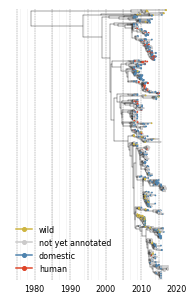

In [24]:
fig,ax = plt.subplots(figsize=(3,5),facecolor='w')

# this sets the grey vertical shading 
every=12
xDates=['%04d-01-01'%(y) for y in range(1975,2018)]

[ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates))]
#ax.set_xticks([bt.decimalDate(x)+1/24.0 for x in xDates if (int(x.split('-')[1])-1)%every==0])

#ax.set_xticklabels([convertDate(x,'%Y-%m-%d','%Y') if x.split('-')[1]=='01' else convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0])
ax.tick_params(axis='x',labelsize=8,size=0)

# this sets the vertical dashed lines on the tree
[ax.axvline(i,ls='--',lw=0.45,color='grey',zorder=0) for i in range(1975,2018,5)]


branchWidth=0.35 ## default branch width

cmap=mpl.cm.viridis

# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    #   x=k.x ## or from x position determined earlier
    x=k.absoluteTime ## or use absolute time instead
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
#     xp=k.parent.x ## get x position of current object's parent
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        #c='indianred' ## colour can be fixed
#     c=cmap(k.height/ll.treeHeight) ## or be a function of something else
#     c=[cmap(k.traits['posterior']) if k.traits.has_key('posterior') else cmap(1.0)][0]
    #c=colors[k.traits['geo']]
    #c=['#63C78A' if k.traits['geo']=='cambodia' else '#6A34CA'][0] ## can be discrete too
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        s=sizes[k.name]
        #s=sizes[k.name] ## tip size specified in a dictionary
        #s=50-40*k.height/tree.treeHeight
        
        
        #ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    if isinstance(k, bt.leaf):
        if k.name in colors:
            c = colors[k.name]
        else: 
            c = '#CBCACA'
            print(k.name)
        a = alphas[k.name]
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
    
    if k.branchType =='leaf':
        c="#000000"
        #c = colors[k.name]
        
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        c="#000000"
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    for key in color_key:
        marker = mlines.Line2D(range(1), range(1), color = color_key[key], marker='o', markerfacecolor = color_key[key], label = key, markersize = 4)
        han_list.append(marker)

    ax.legend(handles = han_list, markerfirst = True, frameon=False, loc=3, fontsize=8)

        
# set axis limits, remove border lines         
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(-5,tree.ySpan+5)
ax.tick_params(axis='y',labelsize=0,size=0)
#ax.set_xticklabels([])
ax.set_yticklabels([])

#ax.set_xlim(bt.decimalDate('2008-01-01'),bt.decimalDate('2016-12-30'))
ax.set_ylim(-5,tree.ySpan+5)


plt.savefig('/Users/lmoncla/Documents/Conferences/LSRF-annual-meeting-2019/poster/HA-annotated-tree-2019-10-01.pdf', dpi=300)
plt.show()

## Plot tree highlighting the Cambodia 2013 samples

In [19]:
# make a dictionary for color and size
color = {}
size = {}

for k in tree.Objects: ## iterate over objects in tree
    #print(k)
    if isinstance(k, bt.leaf) == True:
        if "cambodia" in k.name and ("2012" in k.name or "2013" in k.name or "2014" in k.name):
            size[k.name] = 2
            color[k.name] = colors[k.name]
        else:
            color[k.name] = '#CBCACA'
            size[k.name] = 0

In [20]:
# to change the colors 
for c in color: 
    if color[c] == '#13257a':
        color[c] = '#368FE3'

In [21]:
# color dictionary for key 
color_key2 = {"human" : '#E3363B', "poultry": '#368FE3'}

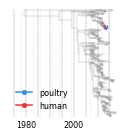

In [23]:
fig,ax = plt.subplots(figsize=(2,2),facecolor='w')

# this sets the grey vertical shading 
every=12
xDates=['%04d-01-01'%(y) for y in range(1975,2018)]

[ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates))]
#ax.set_xticks([bt.decimalDate(x)+1/24.0 for x in xDates if (int(x.split('-')[1])-1)%every==0])

#ax.set_xticklabels([convertDate(x,'%Y-%m-%d','%Y') if x.split('-')[1]=='01' else convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0])
ax.tick_params(axis='x',labelsize=8,size=0)

# this sets the vertical dashed lines on the tree
[ax.axvline(i,ls='--',lw=0.45,color='grey',zorder=0) for i in range(1975,2018,5)]


branchWidth=0.35 ## default branch width

cmap=mpl.cm.viridis

# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    #   x=k.x ## or from x position determined earlier
    x=k.absoluteTime ## or use absolute time instead
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
#     xp=k.parent.x ## get x position of current object's parent
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        #c='indianred' ## colour can be fixed
#     c=cmap(k.height/ll.treeHeight) ## or be a function of something else
#     c=[cmap(k.traits['posterior']) if k.traits.has_key('posterior') else cmap(1.0)][0]
    #c=colors[k.traits['geo']]
    #c=['#63C78A' if k.traits['geo']=='cambodia' else '#6A34CA'][0] ## can be discrete too
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        s=size[k.name]
        #s=sizes[k.name] ## tip size specified in a dictionary
        #s=50-40*k.height/tree.treeHeight
        
        
        #ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    if isinstance(k, bt.leaf):
        if k.name in color:
            c = color[k.name]
        else: 
            c = '#CBCACA'
            print(k.name)
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
    
    if k.branchType =='leaf':
        c="#9F9F9F"
        
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        c="#9F9F9F"
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    for key in color_key2:
        marker = mlines.Line2D(range(1), range(1), color = color_key2[key], marker='o', markerfacecolor = color_key2[key], label = key, markersize = 4)
        han_list.append(marker)

    ax.legend(handles = han_list, markerfirst = True, frameon=False, loc=3, fontsize=8)

        
# set axis limits, remove border lines         
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(-5,tree.ySpan+5)
ax.tick_params(axis='y',labelsize=0,size=0)
#ax.set_xticklabels([])
ax.set_yticklabels([])

#ax.set_xlim(bt.decimalDate('2008-01-01'),bt.decimalDate('2016-12-30'))
ax.set_ylim(-5,tree.ySpan+5)


plt.savefig('/Users/lmoncla/Documents/Fellowships/LSRF/figures/H5N1-Cambodia-only-long-2018-10-01.pdf', dpi=300)
plt.show()

## Notes on TMRCA for human Cambodian samples 

I used this website to convert dates: http://sopac.ucsd.edu/convertDate.shtml

date that all Cambodia 2013 human samples share a common ancestor: 5.2992 
date of youngest tip: 2017.6356 (August 20, 2017)

2017.6356 - 5.2992 = 2012.3364 (May 3, 2012) 

95% posterior density: 5.1193, 5.4974

2017.6356 - 5.1193 = 2012.5163 (July 7, 2012)

2017.6356 - 5.4974 = 2012.1382 (February 20, 2012)

Probability is very high that this node was in Cambodia at that time. 